In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('/content/ecommerce_customer_behavior_dataset.csv')
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

In [21]:
df.describe()

,Customer ID,Age,Purchase Amount ($),Time Spent on Website (min),Number of Items Purchased,Review Score (1-5),Delivery Time (days)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.789900,503.892494,29.918400,4.998500,2.995100,7.013000
std,2886.89568,15.005521,286.238084,17.002107,2.574988,1.404163,3.721561
min,1.00000,18.000000,5.190000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,254.937500,15.000000,3.000000,2.000000,4.000000
50%,5000.50000,44.000000,506.195000,30.000000,5.000000,3.000000,7.000000
75%,7500.25000,57.000000,749.135000,45.000000,7.000000,4.000000,10.000000
max,10000.00000,69.000000,999.980000,59.000000,9.000000,5.000000,13.000000


# **Data Processing**

In [4]:
# drop columns

df = df.drop('Customer ID', axis=1)

In [5]:
# Convert boolean columns to binary

df['Return Customer'] = df['Return Customer'].astype(int)

# **Data Visualization**

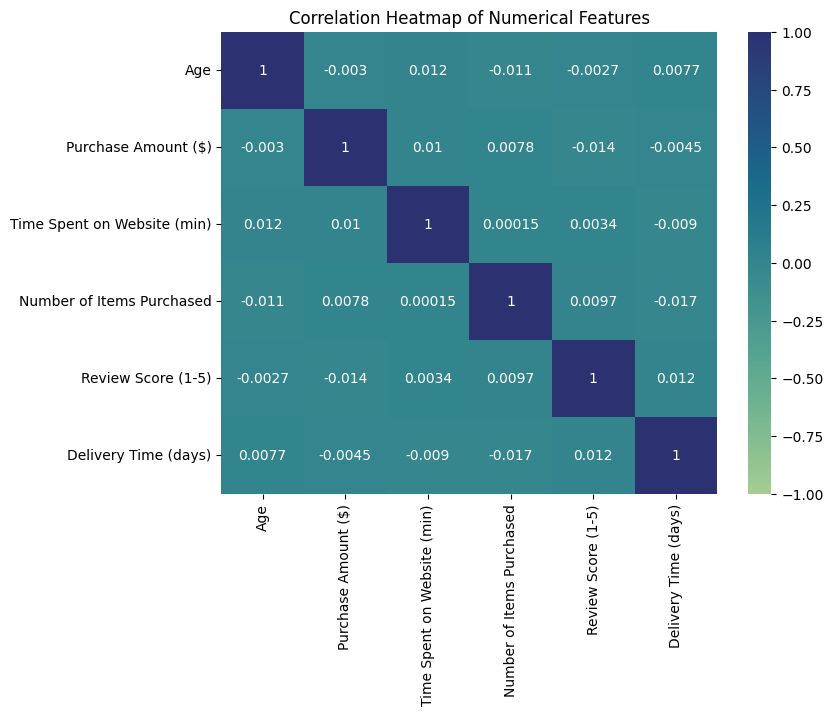

In [34]:
# Correlation Heatmap for Numerical Features
plt.figure(figsize=(8, 6))
numerical_columns = ['Age', 'Purchase Amount ($)', 'Time Spent on Website (min)',
                     'Number of Items Purchased', 'Review Score (1-5)', 'Delivery Time (days)']
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='crest', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# **Encoding**

**Encode categorical variables**

In [6]:
le = LabelEncoder()
for column in ['Gender', 'Location', 'Product Category', 'Device Type', 'Payment Method', 'Discount Availed',
               'Subscription Status', 'Customer Satisfaction']:
    df[column] = le.fit_transform(df[column])

# **Scaling**

**Standardize numerical features**

In [7]:
scaler = StandardScaler()
numerical_features = ['Age', 'Purchase Amount ($)', 'Time Spent on Website (min)', 'Number of Items Purchased',
                      'Review Score (1-5)', 'Delivery Time (days)']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# **PCA**

**Dimensionality Reduction**

In [8]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# **Clustering with K-means**

**using the elbow method**

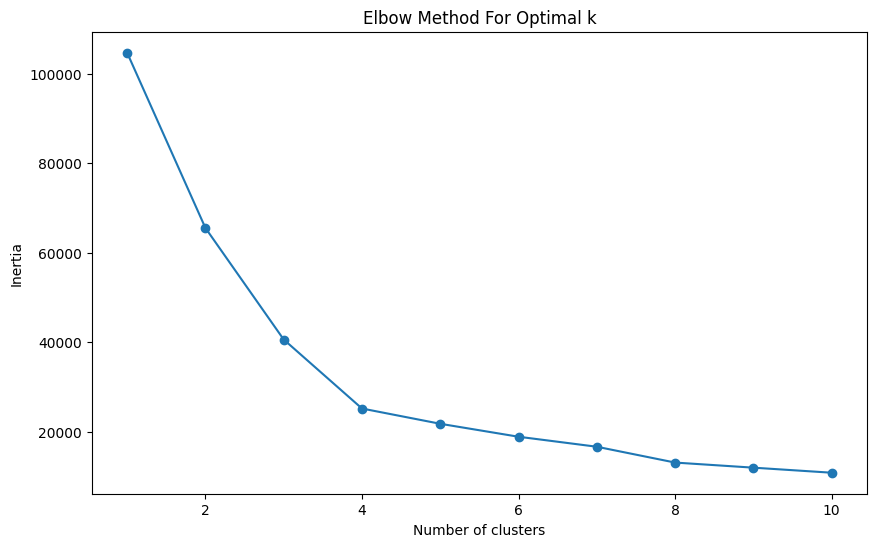

In [9]:
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot/curve
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
# I take 4 as optimal number
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(df_pca)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# **silhouette score**

In [11]:
# Evaluate the clusters with silhouette score
silhouette_avg = silhouette_score(df_pca, clusters)
print(f'Silhouette Score for 4 clusters: {silhouette_avg}')

Silhouette Score for 4 clusters: 0.4300387310774931


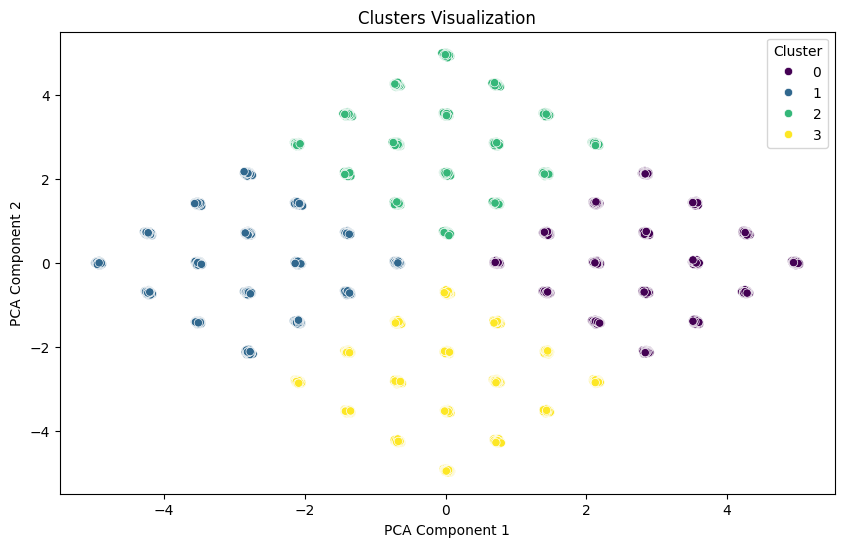

In [12]:
# visualize the cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()